# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [4]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/JoycelineAS/DataMiningA-JoycelineAS/refs/heads/main/penguins_size.csv")
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
313,Gentoo,Biscoe,49.5,16.1,224.0,5650.0,MALE
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,MALE
212,Chinstrap,Dream,51.9,19.5,206.0,3950.0,MALE
100,Adelie,Biscoe,35.0,17.9,192.0,3725.0,FEMALE
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,FEMALE
210,Chinstrap,Dream,50.2,18.8,202.0,3800.0,MALE
277,Gentoo,Biscoe,45.5,15.0,220.0,5000.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [24]:
# 2
df = pd.read_csv("https://raw.githubusercontent.com/JoycelineAS/DataMiningA-JoycelineAS/refs/heads/main/penguins_size.csv")
df.info()

# Conclusion
# Dataset ini terdiri dari 7 kolom dengan total 344 entri. Beberapa kolom memiliki nilai yang hilang (missing values), terutama pada kolom "sex". Sebagian besar kolom bertipe data float, sementara "species", "island", dan "sex" bertipe objek (string).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [39]:
df.describe()

#Conclusion
#Berdasarkan hasil describe(), kolom numerik seperti culmen_length_mm, culmen_depth_mm, flipper_length_mm, dan body_mass_g memiliki 342 data, dengan variasi yang cukup besar. Nilai rata-rata, standar deviasi, serta rentang minimum dan maksimum memberikan gambaran bahwa penguin memiliki variasi ukuran fisik yang signifikan, terutama pada massa tubuh dan panjang sirip.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [40]:
#4
species_column = df['species'].value_counts(dropna=False)
print(species_column)

island_column = df['island'].value_counts(dropna=False)
print(island_column)

sex_column = df['sex'].value_counts(dropna=False)
print(sex_column)

#Conclusion
#species: Spesies penguin yang paling banyak dalam dataset adalah Adelie, diikuti oleh Gentoo dan Chinstrap.
#island: Pulau Biscoe memiliki jumlah penguin terbanyak, diikuti oleh Dream dan Torgersen.
#sex: Terdapat banyak data yang hilang pada kolom sex, dengan jumlah penguin jantan sedikit lebih banyak daripada betina.

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [41]:
#5
df.fillna({
    'culmen_length_mm': df['culmen_length_mm'].mean(),
    'culmen_depth_mm': df['culmen_depth_mm'].mean(),
    'flipper_length_mm': df['flipper_length_mm'].mean(),
    'body_mass_g': df['body_mass_g'].mean(),
    'sex': df['sex'].mode()[0]
}, inplace=True)

df['sex'] = df['sex'].replace('.', df['sex'].mode()[0])

df.isnull().sum()

#Conclusion
#Mengisi nilai yang hilang dengan nilai rata-rata dan modus, kemudian memeriksa apakah masih ada nilai kosong di setiap kolom.

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

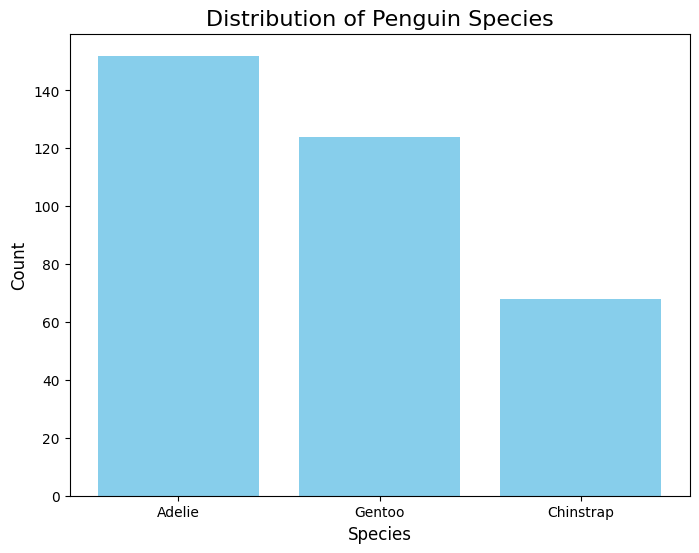

In [43]:
#6
species_counts = df['species'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(species_counts.index, species_counts.values, color='skyblue')

plt.title('Distribution of Penguin Species', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

#Conclusion
#Visualisasi menunjukkan distribusi spesies penguin. Terdapat ketidakseimbangan dalam dataset, di mana jumlah penguin tidak merata antar spesies. Penguin Adelie memiliki jumlah tertinggi, sedangkan penguin Chinstrap memiliki jumlah paling sedikit. Hal ini dapat memengaruhi kinerja model, membuatnya lebih baik dalam mengidentifikasi penguin Adelie karena ada lebih banyak contoh untuk dipelajari, yang berpotensi menyebabkan model mengalami overfitting.




7. Check unique value of our target variable

In [47]:
#7
print(df['species'].unique())

#Conclusion
#Mengecek unique value species

[0 1 2]


8. encode categorical columns and display the results


In [48]:
#8
label_encoder = LabelEncoder()

df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])

df.sample(n = 5)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
43,0,1,44.1,19.7,196.0,4400.0,1
207,1,1,52.2,18.8,197.0,3450.0,1
131,0,2,43.1,19.2,197.0,3500.0,1
112,0,0,39.7,17.7,193.0,3200.0,0
162,1,1,46.6,17.8,193.0,3800.0,0


9. encode the target column and display the results

In [49]:
#9
df['species'] = label_encoder.fit_transform(df['species'])

df.sample(5)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
287,2,0,49.5,16.2,229.0,5800.0,1
107,0,0,38.2,20.0,190.0,3900.0,1
230,2,0,40.9,13.7,214.0,4650.0,0
77,0,2,37.2,19.4,184.0,3900.0,1
171,1,1,49.2,18.2,195.0,4400.0,1


10. create a heatmap to see the correlation and explain the conclusion

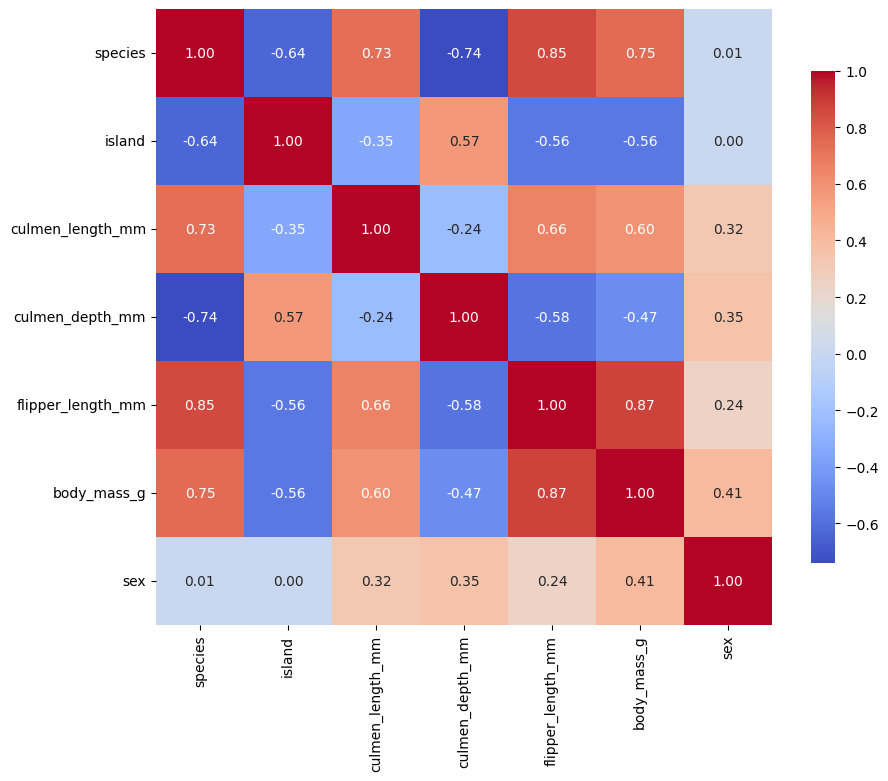

In [13]:
#10
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.show()

#Conclusion
#Dari heatmap korelasi, entitas yang paling berkorelasi dengan spesies penguin adalah flipper_length_mm, yaitu panjang sirip penguin. Selanjutnya, culmen_length_mm dan body_mass_g juga menunjukkan korelasi positif yang tinggi dengan spesies. Sebaliknya, island dan culmen_depth_mm memiliki korelasi negatif yang tinggi. Terakhir, jenis kelamin (sex) menunjukkan korelasi terendah, yang mengindikasikan bahwa jenis kelamin tidak berpengaruh terhadap spesies penguin.

## Machine Learning

1. Splitting X and y

In [14]:
#1
X = df.drop(['species'], axis = 1)
y = df['species']


2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [15]:
#2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (275, 6)
X_test shape: (69, 6)


In [16]:
#3
X_train.shape, X_test.shape

((275, 6), (69, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [17]:
#a
from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model_entropy.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [18]:
#b
y_pred_entropy = model_entropy.predict(X_test)

In [19]:
#c
from sklearn.metrics import accuracy_score

y_pred_entropy = model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print(f"Model accuracy score with criterion entropy: {accuracy_entropy:.4f}")


Model accuracy score with criterion entropy: 0.9275


In [20]:
#d
train_accuracy = model_entropy.score(X_train, y_train)
test_accuracy = model_entropy.score(X_test, y_test)

print(f"Training set score: {train_accuracy:.4f}")
print(f"Test set score: {test_accuracy:.4f}")


Training set score: 0.9709
Test set score: 0.9275


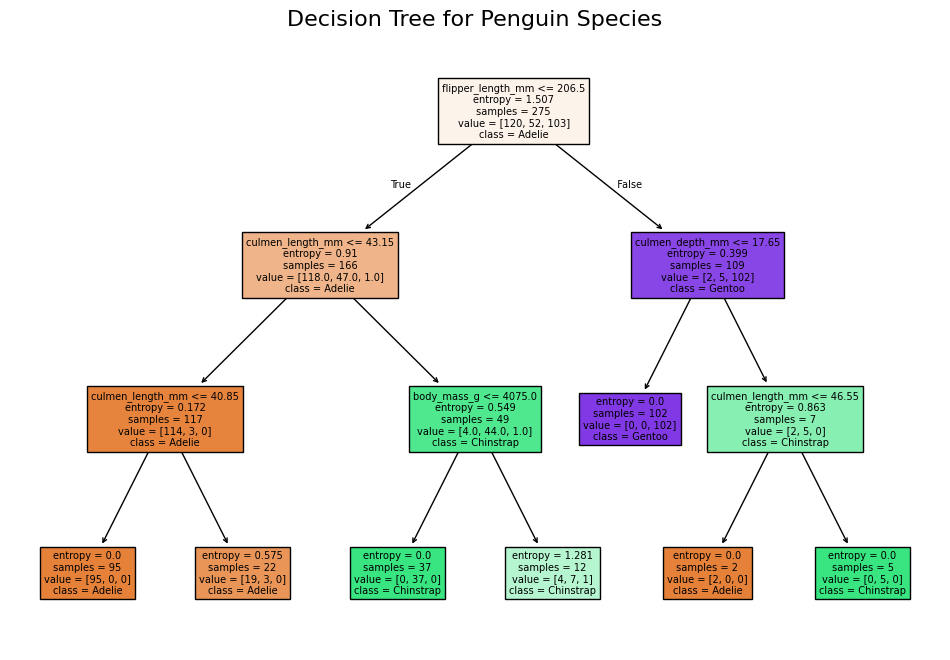

In [26]:
#e
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(model_entropy, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True)
plt.title('Decision Tree for Penguin Species', fontsize=16)
plt.show()



2. Criterion Gini index

In [27]:
#a
from sklearn.tree import DecisionTreeClassifier

model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [28]:
#b
y_pred_gini = model_gini.predict(X_test)

In [29]:
#c
from sklearn.metrics import accuracy_score

y_pred_gini = model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(f"Model accuracy score with criterion gini index: {accuracy_gini:.4f}")

Model accuracy score with criterion gini index: 0.9275


In [30]:
#d
train_accuracy = model_gini.score(X_train, y_train)
test_accuracy = model_gini.score(X_test, y_test)

print(f"Training set score: {train_accuracy:.4f}")
print(f"Test set score: {test_accuracy:.4f}")

Training set score: 0.9709
Test set score: 0.9275


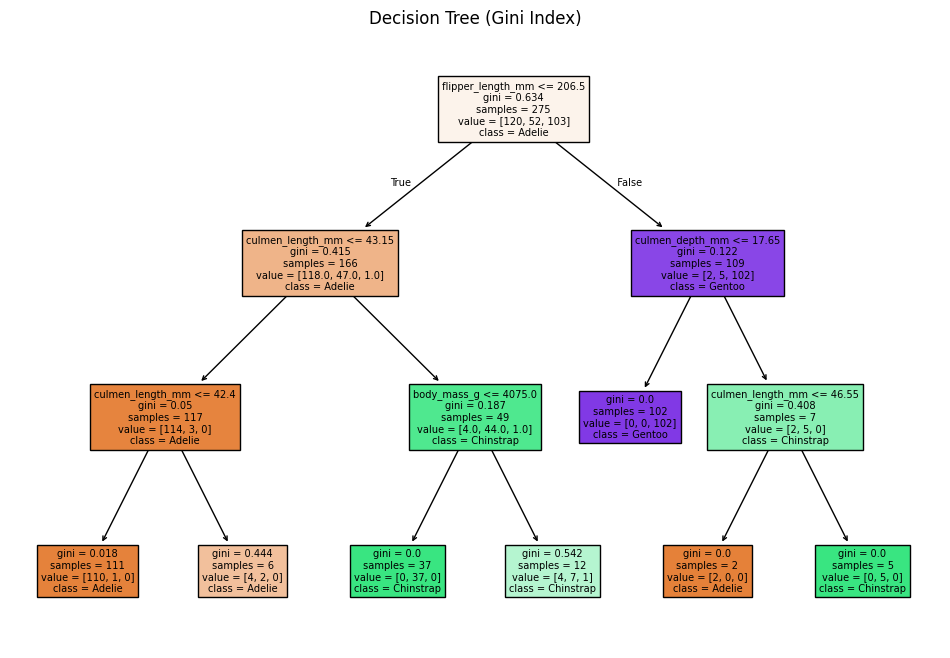

In [31]:
#e
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model_gini, filled=True, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'])
plt.title("Decision Tree (Gini Index)")
plt.show()

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [32]:
#f
from sklearn.metrics import confusion_matrix

cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix Entropy:\n", cm_entropy)

cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix Gini Index:\n", cm_gini)

#Conclusion
#menampilkan hasil Confusion Matrix entorpy dan gini index

Confusion Matrix Entropy:
 [[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]
Confusion Matrix Gini Index:
 [[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]


In [33]:
#g
from sklearn.metrics import classification_report

report_entropy = classification_report(y_test, y_pred_entropy, target_names=['0', '1', '2'])
print("Classification Report (Entropy):\n", report_entropy)

report_gini = classification_report(y_test, y_pred_gini, target_names=['0', '1', '2'])
print("Classification Report (Gini Index):\n", report_gini)

#Conclusion
#menampilkan hasil classification report entorpy dan gini index

Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69

Classification Report (Gini Index):
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69



In [38]:
#h
#Result
#Kedua model Decision Tree, baik yang menggunakan Entropy maupun Gini Index, menunjukkan kinerja baik dengan akurasi 93% dalam mengklasifikasikan spesies penguin. Presisi, recall, dan F1-score serupa untuk kedua model. Spesies Gentoo (kelas 2) memiliki presisi sempurna, namun kelas 1 menunjukkan presisi yang lebih rendah, mengindikasikan potensi salah klasifikasi.

#Conclusion
#Kedua model memiliki kemampuan prediksi yang sama.
#Gini Index lebih cepat dihitung daripada Entropy, sehingga lebih cocok bila efisiensi waktu diperlukan.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [34]:
#a
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)



GaussianNB()

In [35]:
#b
y_pred_nb = nb.predict(X_test)

#Conclusion
#menampilkan predict  X_test menggunakan the Naive Bayes Classifier model.

In [36]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb:.4f}")

#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix:\n", conf_matrix_nb)

#Conclusion
#untuk menampilkan model accuracy dan confusion matrix

Model accuracy score: 0.9710
Confusion Matrix:
 [[31  1  0]
 [ 1 15  0]
 [ 0  0 21]]


In [37]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", class_report_nb)

#Conclusion
#Classification report dari Naive Bayes Classifier yang menunjukkan nilai presisi, recall, f1-score, serta jumlah data (support) untuk model tersebut.

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [ ]:
#f
#Result:
#Model ini menunjukkan kinerja yang sangat baik dalam mengklasifikasikan spesies penguin, dengan tingkat akurasi keseluruhan sebesar 97%. Model ini memiliki presisi dan recall yang tinggi di semua kelas, dengan recall sempurna 1.00 untuk kelas 2, yang berarti model sangat efektif dalam mengidentifikasi data yang benar. Skor F1 yang konsisten tinggi semakin menegaskan keandalan model dalam meminimalkan kesalahan klasifikasi.
#Conclusion:
#Secara keseluruhan, model ini sangat bagus untuk aplikasi praktis dalam identifikasi spesies dan studi ekologi. Agar model tetap efektif, penting untuk melakukan cross-validation secara rutin dan memantau kinerjanya dengan data baru. Selain itu, menganalisis pentingnya fitur dan mencoba algoritma lain dapat memberikan wawasan lebih lanjut dan potensi peningkatan model.

Good Luck :)